In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
data = pd.read_csv('Walmart_Store_sales.csv')

In [49]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
data.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [26]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [28]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [6]:
data.max()

Store                   45
Date            31-12-2010
Weekly_Sales    3818686.45
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
dtype: object

#### Which store has maximum sales

In [7]:
data.loc[data['Weekly_Sales'] ==  data['Weekly_Sales'].max()]

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14  24-12-2010    3818686.45             0        30.59       3.141   

            CPI  Unemployment  
1905  182.54459         8.724

#### Which store has maximum standard deviation, Also find the coefficient of mean to standard deviation

In [8]:
#Here i am grouping by store and finding the standard deviation and mean of each store.
maxstd=pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))


#Just resetting the index.
maxstd = maxstd.reset_index()

#Now we know that CoV is std/ mean we are doing this for each store.
maxstd['CoV'] =(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

#finding the store with maximum standard deviation.
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

#### Which store/s has good quarterly growth rate in Q3â€™2012.

In [77]:
#Converting the data type of date column to dateTime 
data['Date'] = pd.to_datetime(data['Date'],  format = 'mixed')
#defining the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))
#Collecting the data of Q3 and Q2 from original dataset.
Q2data=data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data=data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]
#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

In [78]:
#finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)
#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

In [79]:
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

Store  Q2_Weekly_Sales  Q3_Weekly_Sales  Growth_Rate
6      7       7290859.27       8262787.39         0.13

In [80]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

Store  Q2_Weekly_Sales  Q3_Weekly_Sales  Growth_Rate
13     14      25155535.41      21187560.65        -0.16

#### holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [11]:
#finding the mean sales of non holiday and holiday 
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [12]:
#marking the holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

## Calculating the mean sales during the holidays

In [13]:
Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]


list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
                      
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088555}

####  Monthly, Quaterly and Semester view of sales in units and give insights.

Text(0, 0.5, 'Weekly_Sales')

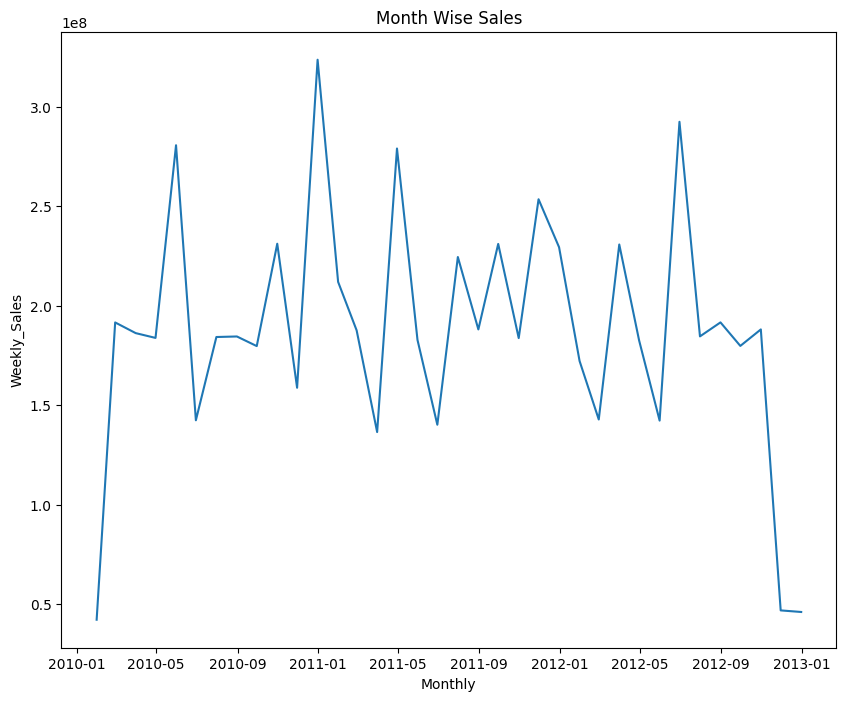

In [14]:
#Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1ME')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')


Text(0, 0.5, 'Weekly_Sales')

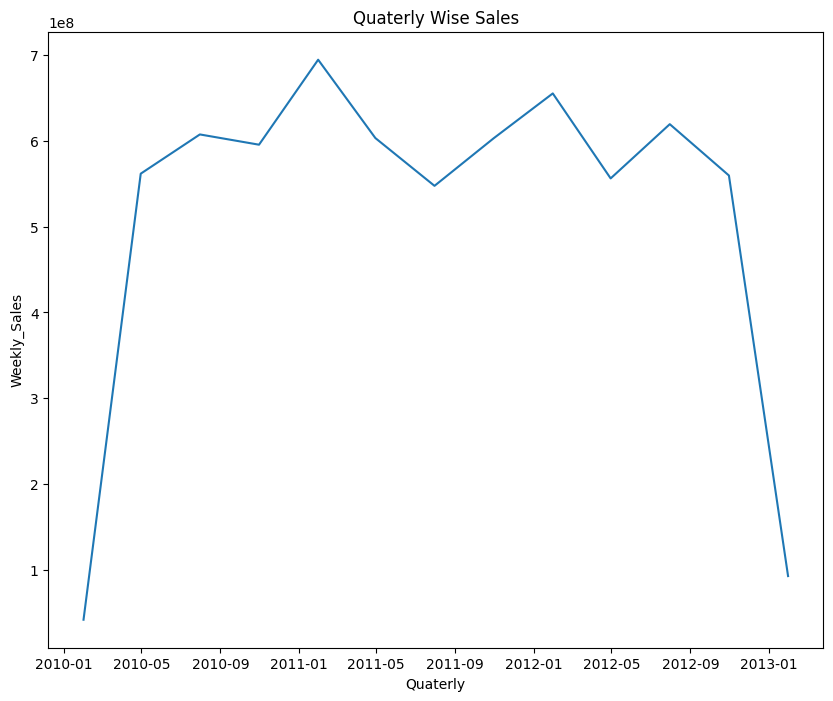

In [15]:
#Quaterly Sales 
Quaterly = data.groupby(pd.Grouper(key='Date', freq='3ME')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

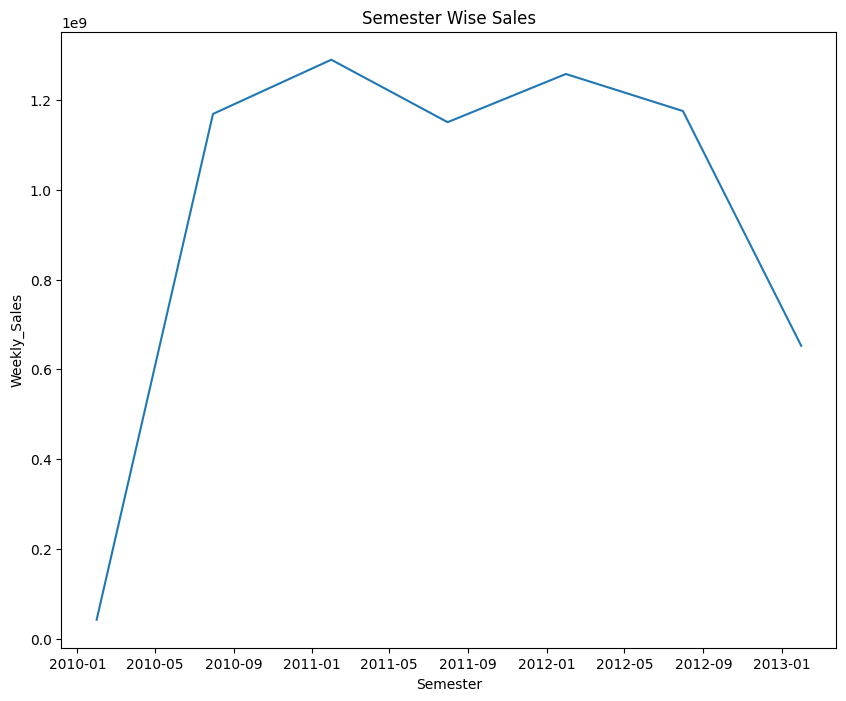

In [16]:
#Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6ME')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

### 1. We can observe from the Monthly Sales Graph that highest sum of sales is recorded in between jan-2011 to march-2011.
### 2. We can observe from the Quarterly Sales Graph that higest sum of sales is recorded in Q1 of 2011 and 2012.
### 3. We can Observe from Semester Sales graph that at beginning of 1st sem of 2010 and 1st sem of 2013 sales are lowest .

# PREDICTION MODELS

In [17]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [69]:
# Assuming 'Date' is your date column, you can convert it to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract day, month, and year into separate columns
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

# Now you can use these columns in your analysis
x = data[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year']]
y = data['Weekly_Sales']

In [70]:
from sklearn.model_selection import train_test_split

# Assuming you already defined X and y
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

##### Linear Regression Model

Linear Regression:

Acuraccy: 14.53760265295675
Mean Absolute Error: 432589.3874585707
Mean Squared Error: 282252114875.45544
Root Mean Squared Error: 531274.048750224


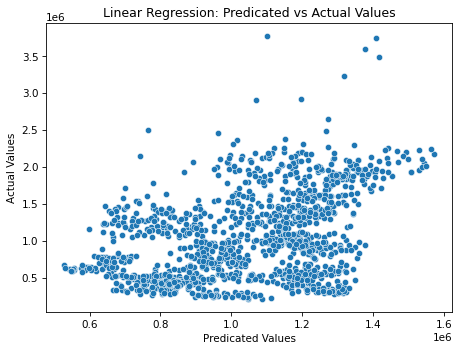

In [76]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Acuraccy:', reg.score(x_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.figure(figsize = (7, 5), dpi = 75)
sns.scatterplot(x = y_pred, y = y_test)
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression: Predicated vs Actual Values')
plt.show()

##### Random Forest Regressor

Random Forest Regressor:

Acurracy: 90.37333031525422
Mean Absolute Error: 84734.37337312492
Mean Squared Error: 31854909438.50913
Root Mean Squared Error: 178479.43701869168


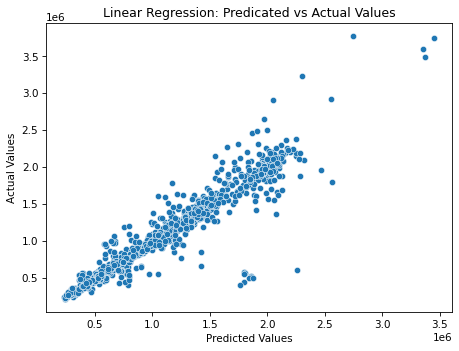

In [75]:
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400, max_depth = 15, n_jobs = 5 )
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('Acurracy:', rfr.score(x_test, y_test)*100)



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.figure(figsize = (7, 5), dpi = 75)
sns.scatterplot(x = y_pred, y = y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression: Predicated vs Actual Values')
plt.show()

## I have utilized 2 algorithms to know which model to use to predict weekly sales.
### Linear Regression model is not an appropriate model to use as acuraccy is very low
### However, Random Forest gives an acurracy of approximately 93%, proving to be the best model to forecast weekly sales

# Changing dates into days by creating new variable

In [82]:
data['Day'] = pd.to_datetime(data['Date']).dt.day_name()
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  day  month  year     Day  
0  211.096358         8.106    5      2  2010  Friday  
1  211.242170         8.106   12      2  2010  Friday  
2  211.289143         8.106   19      2  2010  Friday  
3  211.319643         8.106   26      2  2010  Friday  
4  211.350143         8.106    5      3  2010  Friday